In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import descartes
import geopandas as gpd
from shapely.geometry import Point, Polygon

In [14]:

df=pd.read_excel('coiffeurs.xlsx')
df=df.dropna(how='any')

df=df.drop(labels=['type','markerinnerhtml','liinnerhtml','type.1','coordinates'],axis=1)
df

,nom,lat,lng,num,voie,ville,codepostal,addresse
0,Tete En L'hair Coiffure,49.181161,-0.376700,50,RUE CAPONIERE,CAEN,14000,50 RUE CAPONIERE CAEN
2,Imagina'tif,47.268834,5.010264,11,RUE CHRISTIAN MARVILLET,PERRIGNY-LES-DIJON,21160,11 RUE CHRISTIAN MARVILLET PERRIGNY-LES-DIJON
4,Berang'hair,45.840027,5.029739,319,RUE DES MARAIS,LA BOISSE,01120,319 RUE DES MARAIS LA BOISSE
6,Jad Hair,43.105707,5.863404,199,CHE DU VIEUX REYNIER,LA SEYNE-SUR-MER,83500,199 CHE DU VIEUX REYNIER LA SEYNE-SUR-MER
8,Namast'hair,49.363735,3.460229,12,RUE ST JEAN,CIRY-SALSOGNE,02220,12 RUE ST JEAN CIRY-SALSOGNE
...,...,...,...,...,...,...,...,...
12424,Un Hair De Beaute,47.873159,4.543366,29,RUE DU COMMERCE,SAINTE-COLOMBE-SUR-SEINE,21400,29 RUE DU COMMERCE SAINTE-COLOMBE-SUR-SEINE
12426,Maiatmosf'hair,48.588969,2.564031,135,ALL DU ROITELET,NANDY,77176,135 ALL DU ROITELET NANDY
12428,Atmosph'hair,45.516250,2.372685,6,RUE DES HARAS,SAINT-EXUPERY-LES-ROCHES,19200,6 RUE DES HARAS SAINT-EXUPERY-LES-ROCHES
12430,L'hair Zen,48.352284,-1.196357,13,RUE DES FEUTERIES,FOUGERES,35300,13 RUE DES FEUTERIES FOUGERES


In [93]:
par_ville=df.groupby(by='ville')
#y=df[(df['ville'].value_counts()>10)==True] fonctionne pas
df['ville'].value_counts()

ville
TOULOUSE                    30
NANTES                      26
STRASBOURG                  23
NICE                        22
GRENOBLE                    20
                            ..
FLORIMONT                    1
CAMBLAIN L'ABBE              1
CHALLES-LES-EAUX             1
VITTEL                       1
SAINT-EXUPERY-LES-ROCHES     1
Name: count, Length: 3473, dtype: int64

<Axes: >

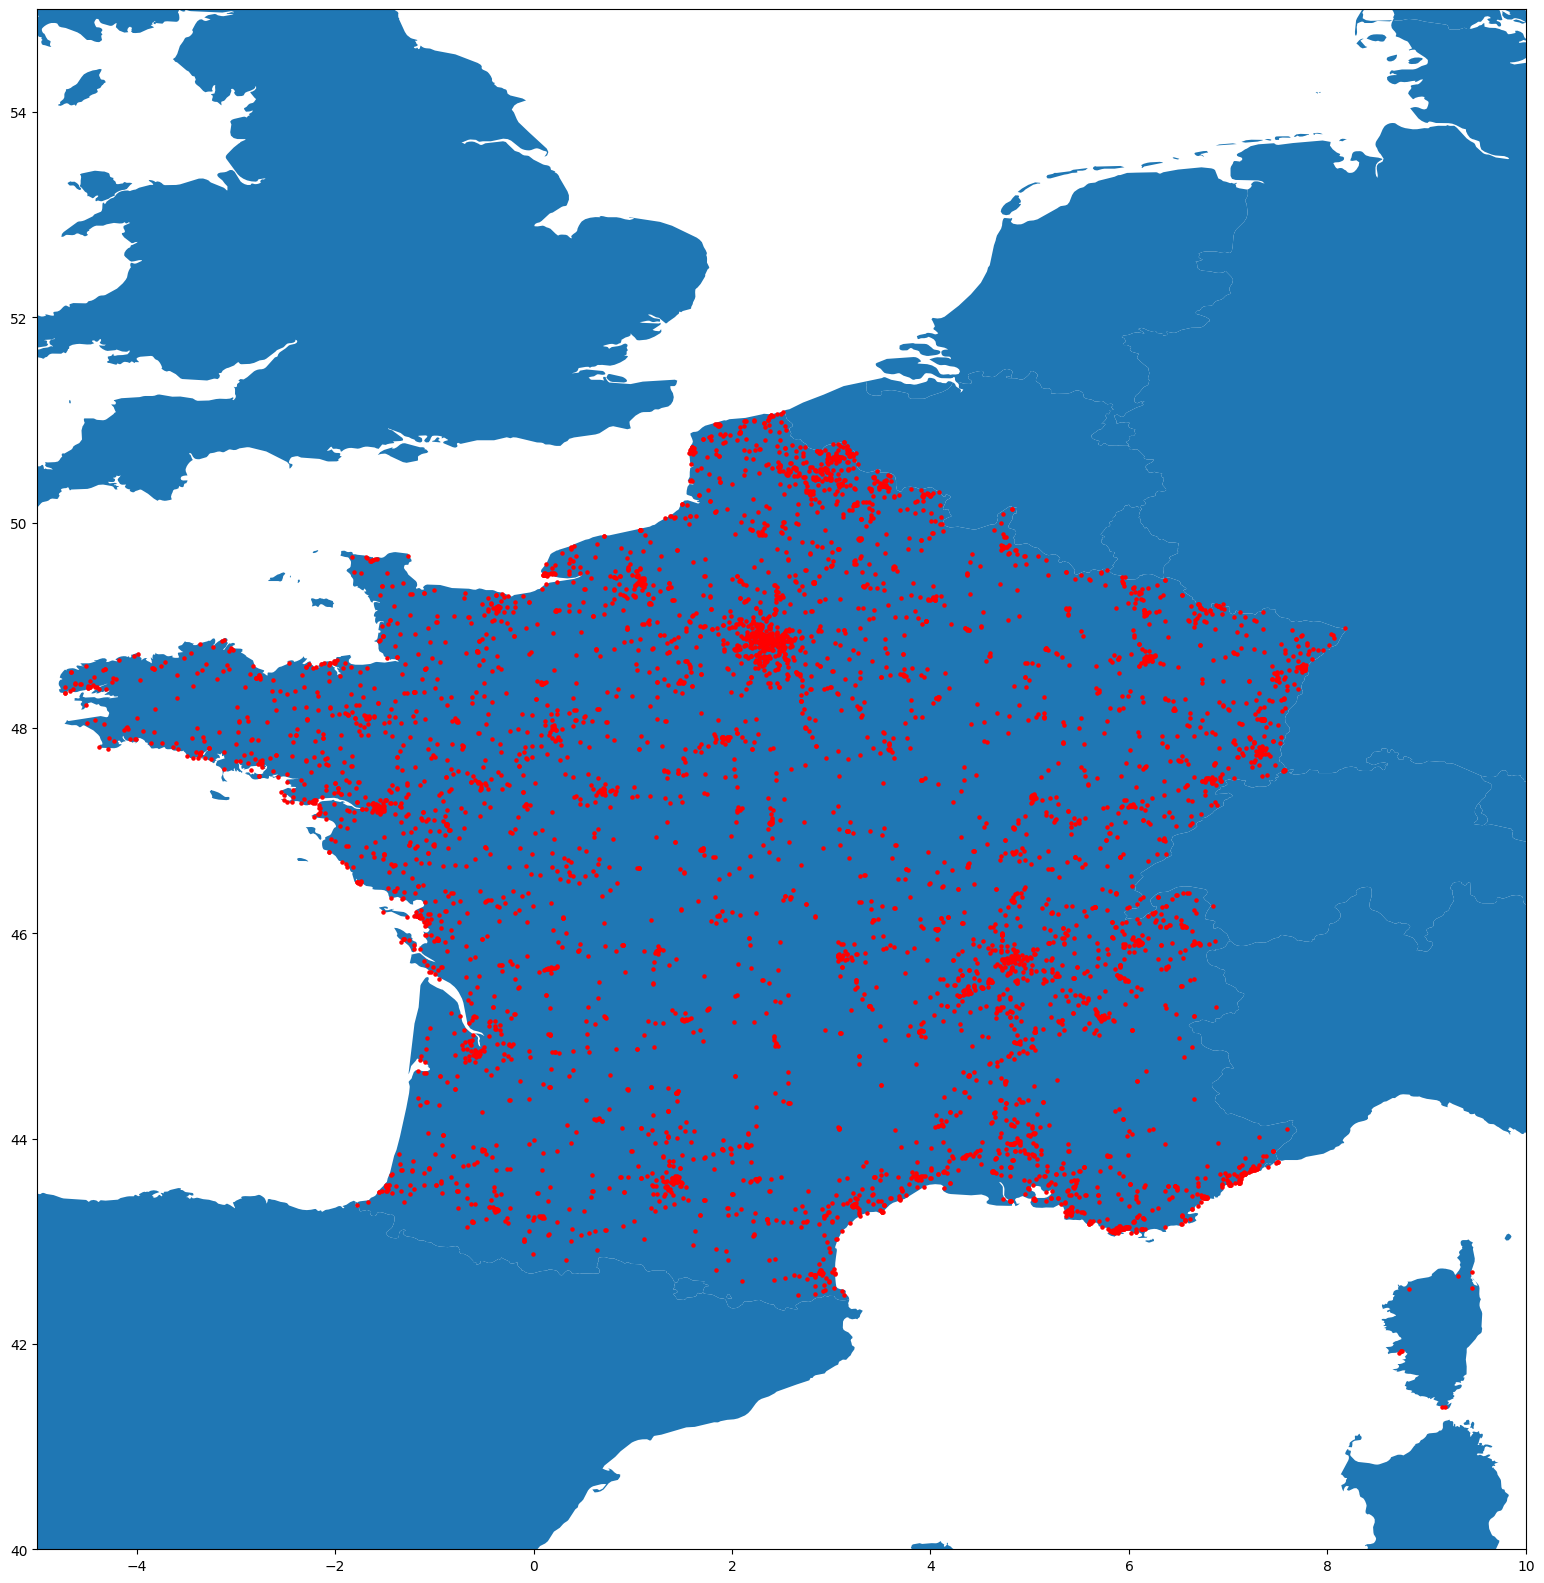

In [63]:
france_map=gpd.read_file(r"D:\Users\Alex\info-mines\pe-hackathon\ne_10m_admin_0_countries_fra.shp") #j'ai essayé avec un autre jeu de données focus sur la France mais ça ne fonctionnait pas
crs = ('epsg', '4326') #la référence pour latitude longitude
geometry = [Point(xy) for xy in zip(df['lng'], df['lat'])]
geo_df = gpd.GeoDataFrame(df, crs=crs, geometry=geometry)
fig, ax = plt.subplots(figsize=(40,20))
plt.xlim(-5,10) #pour zoomer sur la france 
plt.ylim(40,55)
france_map.plot(ax=ax)
geo_df.plot(ax=ax, markersize=5, color='red', marker='o', label='Neg')
#les liens sur lesquels je me suis appuyer https://towardsdatascience.com/geopandas-101-plot-any-data-with-a-latitude-and-longitude-on-a-map-98e01944b972 
#et https://www.naturalearthdata.com/downloads/10m-cultural-vectors/ pour les données